# Optimization Methods: Assignment 4

---

## Part 2: Programming problems

In [62]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Problem 1: Line Search

We consider the function:

$$ f(x) = x_1^2 + 2x_2^2 $$

### 1. Define a function that computes $f(x)$ for any $x = (x_1,x_2)$

In [63]:
def compute_f(x):
    x1, x2 = x
    f_x = (x1 ** 2 + 2*x2**2)
    return f_x

### 2. Define a function that computes the gradient of $f$, $∇f(x)$ for any $x = (x_1,x_2)$

In [64]:
def gradient_f(x):
    x1, x2 = x
    dx1 = 2 * x1
    dx2 = 4 * x2
    grad = np.array([dx1, dx2])
    return grad

### 3. Evaluate $f$ and its gradient function $∇f$ at $x^{(0)} = (9, 1)^T$

In [65]:
x0 = (9, 1)

f_x0 = compute_f(x0)
grad_x0 = gradient_f(x0)

print(f"f(x0) = {f_x0}")
print(f"∇f(x0) = {grad_x0}")

f(x0) = 83
∇f(x0) = [18  4]


### 4. Define a function $wolfe\_conditions$ that verifies if the first and second Wolfe conditions are verified for some $α > 0$

Given a function, its gradient function, a current point $x$, a direction $d$ and the parameters $η$ and $\bar{η}$ of the Wolfe conditions.

This function should take as input

- A function $f$ (callable object)
- Its gradient function $∇f$ (callable object)
- A current points $x$
- A direction $d$
- A step size $α$
- Parameters $η$ and $\bar{η}$

And should return a tuple of 2 booleans, indicating if each of the Wolfe conditions is verified.

In [66]:
def wolfe_conditions(f, grad_f, x, d, alpha, eta, eta_bar):
    x = np.array(x)
    d = np.array(d)

    # Left hand side g(α) = f(x + αd)
    g_alpha = f(x + alpha * d)

    # Right hand side l(α) = f(x) + ηα∇f(x)^T d
    armijo_rhs = f(x) + eta * alpha * np.dot(grad_f(x), d)

    # First Wolfe Condition: Armijo (sufficient decrease)
    armijo_condition = g_alpha <= armijo_rhs

    # Second Wolfe Condition: Curvature
    curvature_lhs = np.dot(grad_f(x + alpha * d), d)
    curvature_rhs = eta_bar * np.dot(grad_f(x), d)
    curvature_condition = curvature_lhs >= curvature_rhs

    return armijo_condition, curvature_condition


### 5. Test the $wolfe\_conditions$ function for the function $f$ at $x^{(0)} = (9,1)^T$ with $d^{(0)} = −∇f(x^{(0)})$, $α = 0.05$, $η = 0.01$, $\bar{\eta} = 0.8$

In [67]:
x0 = np.array([9, 1])
d0 = -gradient_f(x0)
alpha = 0.05
eta = 0.01
eta_bar = 0.8

# Test Wolfe conditions
armijo, curvature = wolfe_conditions(compute_f, gradient_f, x0, d0, alpha, eta, eta_bar)

print("Armijo condition satisfied:", armijo)
print("Curvature condition satisfied:", curvature)

Armijo condition satisfied: True
Curvature condition satisfied: False


### 6. Define a function $backtracking$ that implements the backtracking line search algorithm

This function should take as input:

- A function $f$ (callable object)
- Its gradient function $∇f$ (callable object)
- A current points $x$
- A direction $d$
- A maximum step size $\bar{α}$
- Parameters $η$ of the first Wolfe conditions

And should return the found value of $α^∗$ and the new iterate $x_{new} = x + α^∗ d$. It should also call the function $wolfe\_conditions$.

In [68]:
def backtracking(f, grad_f, x, d, alpha_bar, eta, rho):
    x = np.array(x)
    d = np.array(d)
    alpha = alpha_bar

    while True:
        armijo, _ = wolfe_conditions(f, grad_f, x, d, alpha, eta, 1)
        if armijo:
            break
        alpha *= rho

    x_new = np.array(x) + alpha * np.array(d)
    return alpha, x_new

### 7. Test the $backtracking$ function for the function $f$ at $x^{(0)} = (9,1)^T$ with $d^{(0)} = −∇f(x^{(0)})$, $\bar{α} = 10$ and $η = 0.01$

In [69]:
x0 = np.array([9, 1])
d0 = -gradient_f(x0)
alpha_bar = 10
eta = 0.01
rho = 0.5

alpha_star, x_new = backtracking(compute_f, gradient_f, x0, d0, alpha_bar, eta, rho)

print("alpha * =", alpha_star)
print("x_new =", x_new)


alpha * = 0.625
x_new = [-2.25 -1.5 ]


## Problem 2: Unconstrained optimization

Consider the function:

$$ f(x) = x_1^3 - x_1 + x_2^3 - x_2 $$

And solve the following problem:

$$ \min_{x \in \mathbb{R}^2} f(x) $$

Using your own implementation of each of the algorithms, with starting point $x^{(0)} = (1,1)^T$

In [70]:
# Function f(x)
def f(x):
    x1, x2 = x
    return x1**3 - x1 + x2**3 - x2

# Gradient of f(x)
def grad_f(x):
    x1, x2 = x
    return np.array([3 * x1**2 - 1, 3 * x2**2 - 1])

# Hessian of f(x)
def hessian_f(x):
    x1, x2 = x
    return np.array([[6 * x1, 0],
                     [0, 6 * x2]])

### 1. Use Gradient Descent with a fixed constant step size, chosen by you

In [71]:
def gradient_descent(f, grad_f, alpha, x_start, max_iter=1000, epsilon=1e-6):
    x = np.array(x_start, dtype=float)
    iterates = [x.copy()]

    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < epsilon:
            break
        x = x - alpha * grad
        iterates.append(x.copy())

    return iterates

### 2. Use Gradient Descent with backtracking line search (to find $\alpha$)

In [72]:
def gradient_descent_backtracking(f, grad_f, x_start, alpha_bar=1.0, eta=1e-4, rho=0.5, max_iter=1000, epsilon=1e-6):
    x = np.array(x_start, dtype=float)
    iterates = [x.copy()]

    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < epsilon:
            break

        d = -grad  # Descent direction
        alpha, x_new = backtracking(f, grad_f, x, d, alpha_bar, eta, rho)
        x = x_new
        iterates.append(x.copy())

    return iterates, alpha

### 3. Use Newthon's method with backtracking line search (to find $\alpha$)

In [73]:
def newton_method_backtracking(f, grad_f, hessian_f, x0, alpha_bar=1.0, eta=0.01, rho=0.5, max_iter=1000, tol=1e-6):
    x = np.array(x0, dtype=float)
    iteration = 0

    for _ in range(max_iter):
        iteration += 1
        grad_x = grad_f(x)

        if np.linalg.norm(grad_x) < tol:
            return x, iteration, alpha

        hess_x = hessian_f(x)
        try:
            d = np.linalg.solve(hess_x, -grad_x)
        except np.linalg.LinAlgError:
            raise ValueError("COuldn't solve the system")

        alpha, x_new = backtracking(f, grad_f, x, d, alpha_bar, eta, rho)

        if np.linalg.norm(x_new - x) < tol:
            return x_new, iteration, alpha

        x = x_new

    raise ValueError("Maximum iterations reached, method did not converge.")

#### Test the algorithms:

In [74]:
# Starting point
x0 = [1.0, 1.0]

# Gradient Descent with fixed step size
alpha = 0.1
iterates = gradient_descent(f, grad_f, alpha, x0)
x_fixed_final = iterates[-1]

print("Gradient Descent with fixed alpha")
print("Final x:", x_fixed_final)
print("Final f(x):", f(x_fixed_final))
print("Iterations:", len(iterates))


# Gradient Descent with backtracking
iterates_bt, optimal_gd_alpha = gradient_descent_backtracking(f, grad_f, x0, alpha_bar=1.0, eta=0.01, rho=0.5)
x_bt_final = iterates[-1] 

print("\nGradient Descent with backtracking alpha")
print("Final x:", x_bt_final)
print("Final f(x):", f(x_bt_final))
print("Iterations:", len(iterates_bt))
print("Optimal alpha found:", optimal_gd_alpha)

# Newton's method with backtracking
x_newton_final, newton_iters, optimal_newton_alpha = newton_method_backtracking(f, grad_f, hessian_f, x0, alpha_bar=1.0, eta=0.01, rho=0.5, max_iter=1000, tol=1e-6)

print("\nNewton’s Method with backtracking alpha")
print("Final x:", x_newton_final)
print("Final f(x):", f(x_newton_final))
print("Iterations:", newton_iters)
print("Optimal alpha found:", optimal_newton_alpha)

Gradient Descent with fixed alpha
Final x: [0.57735041 0.57735041]
Final f(x): -0.7698003589194368
Iterations: 35

Gradient Descent with backtracking alpha
Final x: [0.57735041 0.57735041]
Final f(x): -0.7698003589194368
Iterations: 43
Optimal alpha found: 0.5

Newton’s Method with backtracking alpha
Final x: [0.57735027 0.57735027]
Final f(x): -0.769800358919501
Iterations: 5
Optimal alpha found: 1.0


#### Results:

| Method                             | Final x               | Final f(x)         | Iterations |
|------------------------------------|------------------------|--------------------|------------|
| Gradient Descent (fixed α = 0.1)   | [0.57735, 0.57735]     | -0.76980           | 35         |
| Gradient Descent (backtracking)    | [0.57735, 0.57735]     | -0.76980           | 43         |
| Newton's Method (backtracking)     | [0.57735, 0.57735]     | -0.76980           | 5          |

All three methods converged to the same minimum point and function value, which means that the solution is correct and the algorithms work.

- **Fixed-step gradient descent** required 35 iterations and, in this case, it was a bit more efficient than backtracking, maybe because the fixed step size $\alpha = 0.1$ was already a good one. However, if we try a different fixed $\alpha$, for example $\alpha = 0.05$, we can notice that it takes 76 iterations to converge versus 43 iterations for the gradient descent with backtracking. So, it depends on how good is our $\alpha$ choice.

- **Gradient descent with backtracking** was a bit slower (43 iterations), since it dynamically searches for a valid step size at each iteration. However, it's more efficient when the best step size is unknown.

- **Newton’s method with backtracking** converged in only 5 iterations, showing its quadratic convergence behavior when the Hessian is well-conditioned and the function is twice differentiable.

It's curious that Backtracking for Gradient Descent finds the optimal value $\alpha = 0.5$ but, if we try it in the normal gradient descent, it converges slower than $\alpha = 0.1$. I'm assuming that this is because backtracking selects the biggest step size that satisfies Wolfe Conditions, and maybe $0.1$ is considered small, even if in this case it works better.

Furthermore, the function is not even globally convex, so a big step size (like $\alpha = 10$) might lead to divergence.

## Problem 3: Finite difference 

### 1. Define a function $forward\_finite\_difference$

This function computes the forward finite difference approximation of the first derivative of a function $f$ at a point $x$, and it must take as input a function $f$, a point $x$ and a level $t$ used to compute the finite difference.

The forward finite difference is a numerical method used to approximate the first derivative of a function.

In calculus, the derivative of a function $f$ at a point $x$ is defined as:

$$
f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

However, in practice, we approximate this using a small value $h$ (in our case $t$, called the step size), and drop the limit:

$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

This is known as the forward finite difference approximation.

In [75]:
def forward_finite_difference(f, x, t):
    return (f(x + t) - f(x)) / t

### 2. Define a function $f$ that compute the $sin$ of any real number $x$. Then define another function that outputs the (analytical) derivative of $f$.

In [76]:
def f_sin(x):
    return math.sin(x)

In [77]:
def df(x):
    return math.cos(x)

### 3. Compute the estimate of $f'(x)$ at $x=1$ using the function $forward\_finite\_difference$

for $t = 10^{−16}$, $10^{−15}, ..., 10^{−2}$, $10^{−1} and compute the approximation error for each $t$. Plot this error versus $t$ in $log-log$ scale.

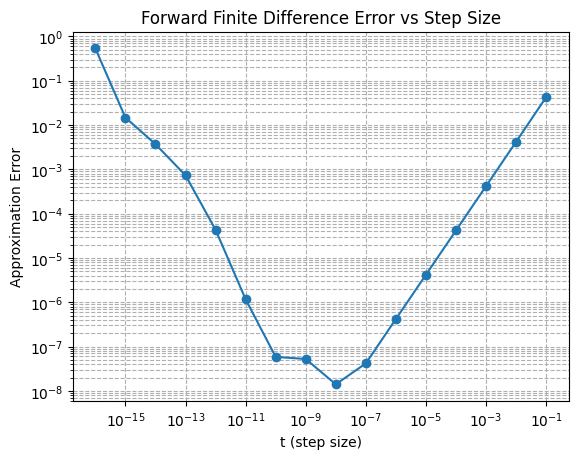

In [78]:
x = 1.0
true_derivative = df(x)

# Generate t values from 10^-16 to 10^-1
t_values = np.logspace(-16, -1, num=16)
errors_forward = []

# Compute approximation error for each t
for t in t_values:
    approx_forward = forward_finite_difference(f_sin, x, t)
    error_forward = abs(approx_forward - true_derivative)
    errors_forward.append(error_forward)

# Plotting the error vs t on a log-log scale
plt.figure()
plt.loglog(t_values, errors_forward, marker='o')
plt.xlabel('t (step size)')
plt.ylabel('Approximation Error')
plt.title('Forward Finite Difference Error vs Step Size')
plt.grid(True, which="both", ls="--")
plt.show()

We can observe that for large $t$, the error is big because the step is too rough. For very small $t$ (like $10^{-16}$), the error increases again due to floating-point round-off errors.

The best choice is usually around $t = 10^{-8}$, where the error is minimized.

### 4. Define a function $central\_difference$

This function computes the central difference approximation of the first derivative of a function $f$ at a point $x$, and it must take as input a function $f$, a point $x$ and a level $t$ used to compute the finite difference.

The central finite difference is another numerical method used to approximate the first derivative of a function with better accuracy than the forward or backward finite difference methods.

Instead of evaluating the function only on one side of the point $x$, it uses values on both sides:

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

It has a higher accuracy than the forward or backward difference because the error term is of order $O(h^2)$ instead of $O(h)$.

In [79]:
def central_difference(f, x, t):
    return (f(x + t) - f(x - t)) / (2 * t)

### 5. Compute the estimate of $f'(x)$ at $x=1$ using the function $central\_difference$

for $t = 10^{−16}$, $10^{−15}, ..., 10^{−2}$, $10^{−1}$ and compute the approximation error for each $t$. Plot this error versus $t$ in $log-log$ scale and on the same plot, the error of the forward finite difference scheme. Comment the results.

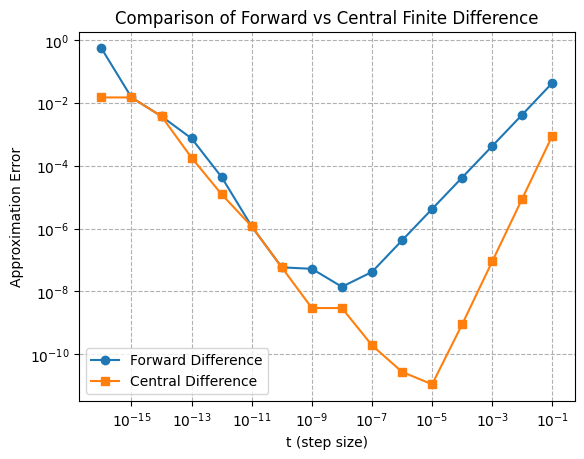

In [80]:
errors_central = []

# Compute errors for both methods
for t in t_values:
    approx_central = central_difference(f_sin, x, t)
    error_central = abs(approx_central - true_derivative)
    errors_central.append(error_central)

# Plotting both errors on the same log-log plot
plt.figure()
plt.loglog(t_values, errors_forward, marker='o', label='Forward Difference')
plt.loglog(t_values, errors_central, marker='s', label='Central Difference')
plt.xlabel('t (step size)')
plt.ylabel('Approximation Error')
plt.title('Comparison of Forward vs Central Finite Difference')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

#### Comment on results

The central difference method shows significantly lower error than the forward method across most values of the step size $t$.

Again, as $t$ becomes very small (e.g., $10^{-16}$), both methods start to show increasing error due to floating-point round-off errors.

However, for moderate values of $t$ (from $10^{-8}$ to $10^{-4}$), the central difference gives much more accurate results.

In fact, using Taylor expansion, we can show that the error term for this approximation is proportional to $t^2$, meaning that the error decreases quadratically as $t$ becomes smaller (second-order accuracy).

In [81]:
print("Optimization Methods SP25 - Assignment 4")
print("Lorenzo Galli - Università della Svizzera Italiana (USI)")

Optimization Methods SP25 - Assignment 4
Lorenzo Galli - Università della Svizzera Italiana (USI)
